# 为什么要使用multiprocessing模块
python提供了os.fork创建进程，提供了thread模块创建线程，这不是足够了吗?

这是不够的，os.fork无法在windows实现，不具有可移植性；线程虽然可以，但由于python的GIL(Global Interpreter Lock，全局解释器锁）的存在，同一时刻python只能运行一个线程，没法将多线程分配到多核上运行。

这就是引入了multiprocessing模块的原因，解决了windows移植到问题和如何利用多核的问题。

如何使用multiprocessing模块呢?就3步。

①定义自己的任务，

    #流水灯任务定义
    def waterlight(task_name, delay_ts):
        print(task_name + "任务启动")
        try:
            while True:
                for i in range(0,8):
                    SAKS.ledrow.on_for_index(i)
                    time.sleep(delay_ts)
                    SAKS.ledrow.off_for_index(i)
        except KeyboardInterrupt:
            print(task_name + "任务被终止")

②将任务交给multiprocess模块，

    #创建led闪烁任务
    led_flash = Process(target=waterlight, args=("流水灯", WATERLIGHT_DELAY))

③启动该任务。

    # 启动任务
    led_flash.start()
    
看吧，就3步，是不是很简单。

# 进程的状态
从大的方面来说，进程在运行过程中有3种状态：就绪态、运行态、阻塞态。

(1)就绪态。

就绪态：进程具备运行条件了，可以被cpu执行了；但还在就绪队列中排着队。

例如，我们led灯例程中有两个地方是就就绪态的。

①进程名.start()执行后，进程进入就绪态了。

②time.sleep()之后，点亮灯(或熄灭灯)之前，进程进入就绪态了。

(2)运行态。

运行态：进程就是在cpu上运行了。

例如，执行把运行灯操作语句，把灯点亮(或者熄灭)时，这是就是运行态。

(3)阻塞态。

阻塞态：进程在等待某个事件发生的过程中，就是阻塞态；此时，一直在阻塞队列中等待着。

例如，执行time.sleep语句，进行延时时。

多任务好吧，你把做的事情告送操作系统，操作系统帮你进行管理、调度。

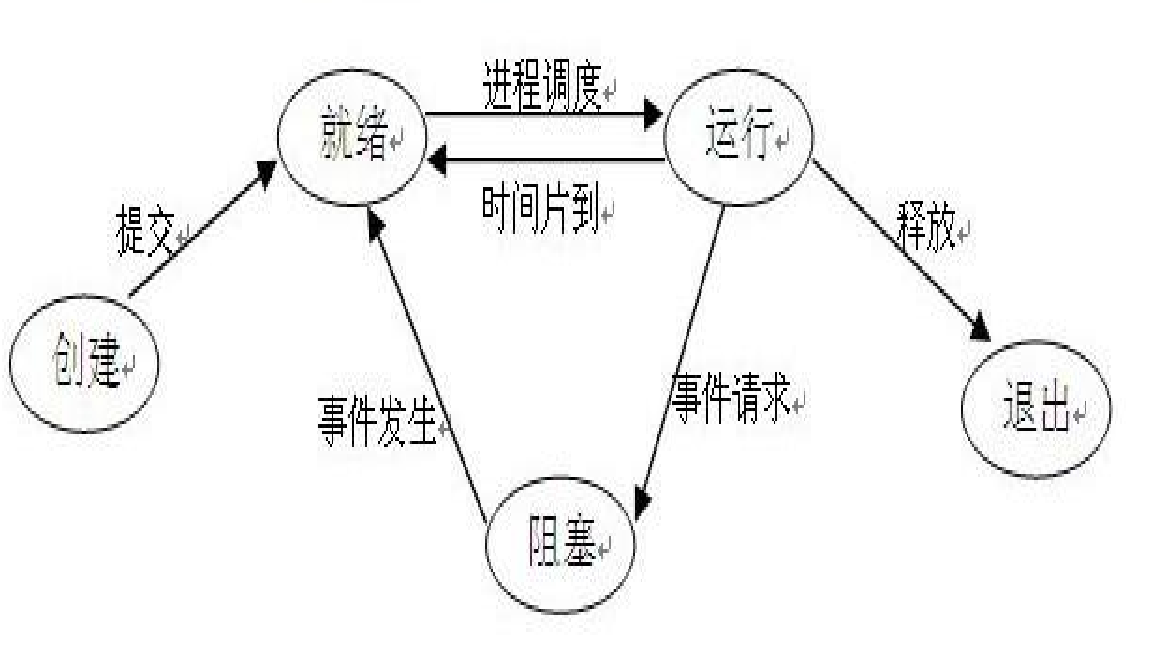

In [1]:
#进程状态图
from IPython.display import Image
Image(filename = "./picture/processing_status.png", width=512, height=468)

# 对比下，multiprocessing模块和thread模块的效率 
下属代码及结论，摘抄自”莫烦python“，
链接：https://morvanzhou.github.io/tutorials/python-basic/multiprocessing/4-comparison/

结论：发现多核/多进程最快，说明在同时间运行了多个任务。 而多线程的运行时间居然比什么都不做的程序还要慢一点，说明多线程还是有一定的短板的。

In [2]:

#要完成数据处理工作
def job(q):
    res = 0
    for i in range(1000000):
        res += i + i**2 + i**3
    q.put(res) # queue

#通常采用的１个进程进程处理    
def normal():
    res = 0
    for _ in range(2):
        for i in range(1000000):
            res += i + i**2 + i**3
    print('normal:', res)

#多线程方式，将数据分布在两个线程中运行
import threading as td

def multithread():
    q = mp.Queue() # thread可放入process同样的queue中
    t1 = td.Thread(target=job, args=(q,))
    t2 = td.Thread(target=job, args=(q,))
    t1.start()
    t2.start()
    t1.join()
    t2.join()
    res1 = q.get()
    res2 = q.get()
    print('multithread:', res1 + res2)
    

    
#multiprocessing多进程方式，将数据分布在两个进程中运行    
import multiprocessing as mp

def multicore():
    q = mp.Queue()
    p1 = mp.Process(target=job, args=(q,))
    p2 = mp.Process(target=job, args=(q,))
    p1.start()
    p2.start()
    p1.join()
    p2.join()
    res1 = q.get()
    res2 = q.get()
    print('multicore:',res1 + res2)
    
#依次调用普通处理、多线程处理、多进程处理
import time

if __name__ == '__main__':
    #普通模式处理，并计算计算时间
    st = time.time()
    normal()
    st1 = time.time()
    print('normal time:', st1 - st)
    print(' ')
    
    #多线程模式处理，并计算计算时间
    multithread()
    st2 = time.time()
    print('multithread time:', st2 - st1)
    print(' ')
    
    #多进程模式处理，并计算计算时间
    multicore()
    print('multicore time:', time.time() - st2)
    print(' ')


normal: 499999666667166666000000
normal time: 7.46769118309021
 
multithread: 499999666667166666000000
multithread time: 8.244486808776855
 
multicore: 499999666667166666000000
multicore time: 3.981152057647705
 


In [3]:
#更多关于multiprocessing的介绍运行下面代码
help("multiprocessing")

Help on package multiprocessing:

NAME
    multiprocessing

MODULE REFERENCE
    https://docs.python.org/3.7/library/multiprocessing
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    # Package analogous to 'threading.py' but using processes
    #
    # multiprocessing/__init__.py
    #
    # This package is intended to duplicate the functionality (and much of
    # the API) of threading.py but uses processes instead of threads.  A
    # subpackage 'multiprocessing.dummy' has the same API but is a simple
    # wrapper for 'threading'.
    #
    # Copyright (c) 2006-2008, R Oudkerk
    # Licensed to PSF under a Contributor Agreement.
    #

PACKAGE CONTENTS
    connection
    context
    dummy (packag